# SVR Implimatation

## Importing Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

## Generate synthetic nonlinear regression data

In [2]:
np.random.seed(42)
X = np.sort(5 * np.random.rand(100,1), axis=0)
y = np.sin(X).ravel() + 0.1 * np.random.randn(100)  # true function + noise

## Fit SVR model (RBF kernel for nonlinear fitting)

In [3]:
svr_model = SVR(kernel='rbf', C=10, epsilon=0.1)
svr_model.fit(X, y)

SVR(C=10)

## Predict on dense grid for smooth curve

In [4]:
X_grid = np.linspace(0, 5, 1000).reshape(-1, 1)
y_pred = svr_model.predict(X_grid)

## Plot original data, predictions, and epsilon tube

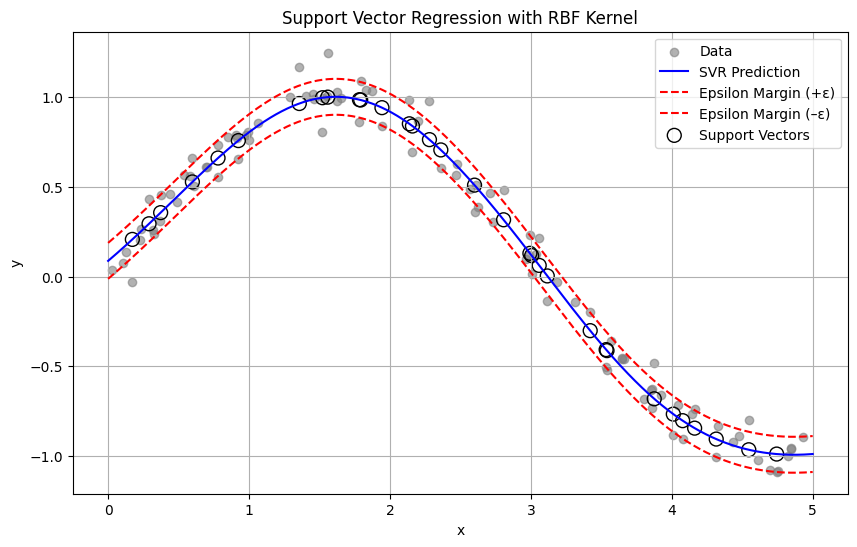

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Data', alpha=0.6)
plt.plot(X_grid, y_pred, color='blue', label='SVR Prediction')
plt.plot(X_grid, y_pred + 0.1, 'r--', label='Epsilon Margin (+ε)')
plt.plot(X_grid, y_pred - 0.1, 'r--', label='Epsilon Margin (–ε)')
#plt.plot(X_grid, np.sin(X_grid), color='green', label='True Function')
plt.scatter(svr_model.support_vectors_[:, 0],
            svr_model.predict(svr_model.support_vectors_),
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')


plt.title("Support Vector Regression with RBF Kernel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



## True Function vs Predicted Function

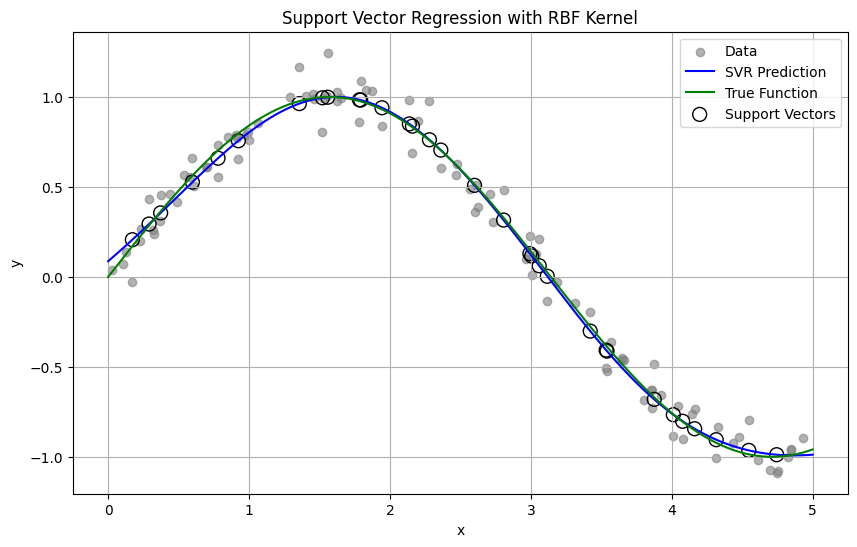

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Data', alpha=0.6)
plt.plot(X_grid, y_pred, color='blue', label='SVR Prediction')
plt.plot(X_grid, np.sin(X_grid), color='green', label='True Function')
plt.scatter(svr_model.support_vectors_[:, 0],
            svr_model.predict(svr_model.support_vectors_),
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')


plt.title("Support Vector Regression with RBF Kernel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



# SVR Function Evolution
$$
\hat{y}(x) = \sum_{i=1}^{n} (\alpha_i - \alpha_i^*) \exp\left(-\gamma \sum_{j=1}^{d} (x_{ij} - x_j)^2 \right) + b
$$

In [7]:
def svr_predict(x, svr_model):
    # Extract model components
    SV = svr_model.support_vectors_
    dual_coef = svr_model.dual_coef_[0]
    intercept = svr_model.intercept_[0]
    gamma = svr_model._gamma

    # Compute squared distances
    diff = SV - x
    dist_sq = np.sum(diff**2, axis=1)
    K = np.exp(-gamma * dist_sq)

    # Compute prediction
    y_pred = np.dot(dual_coef, K) + intercept


    return y_pred


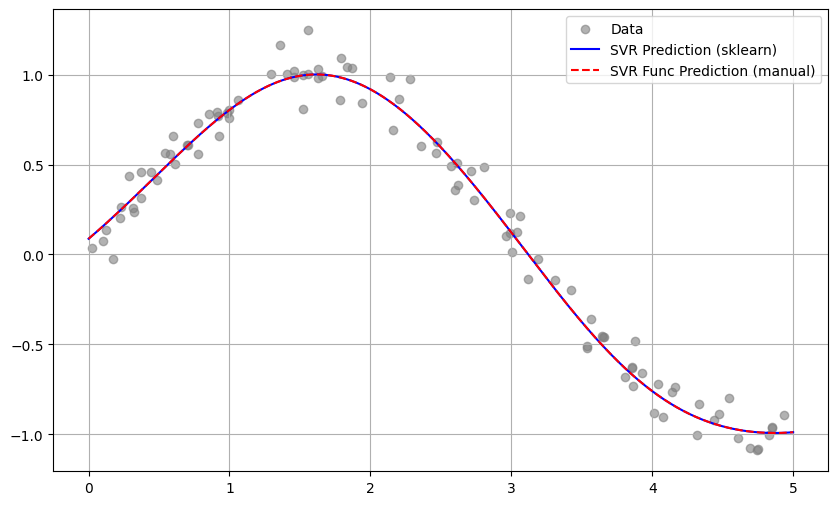

In [8]:
# Vectorize your prediction function over X_grid
y_manual_pred = np.array([svr_predict(x.reshape(1, -1), svr_model) for x in X_grid])

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='gray', alpha=0.6, label='Data')
plt.plot(X_grid, y_pred, color='blue', label='SVR Prediction (sklearn)')
plt.plot(X_grid, y_manual_pred, color='red', linestyle='--', label='SVR Func Prediction (manual)')
plt.legend()
plt.grid(True)
plt.show()


## Print the symbolic form of the learned equation

In [9]:

gamma=svr_model._gamma
SV=svr_model.support_vectors_
dual_coef=svr_model.dual_coef_[0]
intercept=svr_model.intercept_[0]

### Python code format

In [10]:
print("The fitted SVR equation is (in Python code):\n")
print("y = ", end="")

for i in range(SV.shape[0]):
    print(f"{dual_coef[i]:+.4f} * np.exp(-{gamma:.4f} * (", end="")
    for j in range(SV.shape[1]):
        print(f"({SV[i,j]:.4f}-x[{j}])**2", end="")
        if j < SV.shape[1] - 1:
            print(" + ", end="")
    print("))", end="")

print(f"{intercept:+.4f}")


The fitted SVR equation is (in Python code):

y = -10.0000 * np.exp(-0.4565 * ((0.1719-x[0])**2))+10.0000 * np.exp(-0.4565 * ((0.2904-x[0])**2))+0.7939 * np.exp(-0.4565 * ((0.3728-x[0])**2))+10.0000 * np.exp(-0.4565 * ((0.5980-x[0])**2))-10.0000 * np.exp(-0.4565 * ((0.7800-x[0])**2))-6.9346 * np.exp(-0.4565 * ((0.9243-x[0])**2))+10.0000 * np.exp(-0.4565 * ((1.3567-x[0])**2))-10.0000 * np.exp(-0.4565 * ((1.5212-x[0])**2))+10.0000 * np.exp(-0.4565 * ((1.5586-x[0])**2))-10.0000 * np.exp(-0.4565 * ((1.7838-x[0])**2))+10.0000 * np.exp(-0.4565 * ((1.7923-x[0])**2))-4.7507 * np.exp(-0.4565 * ((1.9434-x[0])**2))+10.0000 * np.exp(-0.4565 * ((2.1377-x[0])**2))-10.0000 * np.exp(-0.4565 * ((2.1597-x[0])**2))+10.0000 * np.exp(-0.4565 * ((2.2803-x[0])**2))-7.2205 * np.exp(-0.4565 * ((2.3611-x[0])**2))-10.0000 * np.exp(-0.4565 * ((2.6003-x[0])**2))+10.0000 * np.exp(-0.4565 * ((2.8064-x[0])**2))+8.7106 * np.exp(-0.4565 * ((2.9933-x[0])**2))-10.0000 * np.exp(-0.4565 * ((3.0056-x[0])**2))+10.0000 * np.e

In [11]:
def manual_svr_predict(x):
  y = -10.0000 * np.exp(-0.4565 * ((0.1719-x[0])**2))+10.0000 * np.exp(-0.4565 * ((0.2904-x[0])**2))+0.7939 * np.exp(-0.4565 * ((0.3728-x[0])**2))+10.0000 * np.exp(-0.4565 * ((0.5980-x[0])**2))-10.0000 * np.exp(-0.4565 * ((0.7800-x[0])**2))-6.9346 * np.exp(-0.4565 * ((0.9243-x[0])**2))+10.0000 * np.exp(-0.4565 * ((1.3567-x[0])**2))-10.0000 * np.exp(-0.4565 * ((1.5212-x[0])**2))+10.0000 * np.exp(-0.4565 * ((1.5586-x[0])**2))-10.0000 * np.exp(-0.4565 * ((1.7838-x[0])**2))+10.0000 * np.exp(-0.4565 * ((1.7923-x[0])**2))-4.7507 * np.exp(-0.4565 * ((1.9434-x[0])**2))+10.0000 * np.exp(-0.4565 * ((2.1377-x[0])**2))-10.0000 * np.exp(-0.4565 * ((2.1597-x[0])**2))+10.0000 * np.exp(-0.4565 * ((2.2803-x[0])**2))-7.2205 * np.exp(-0.4565 * ((2.3611-x[0])**2))-10.0000 * np.exp(-0.4565 * ((2.6003-x[0])**2))+10.0000 * np.exp(-0.4565 * ((2.8064-x[0])**2))+8.7106 * np.exp(-0.4565 * ((2.9933-x[0])**2))-10.0000 * np.exp(-0.4565 * ((3.0056-x[0])**2))+10.0000 * np.exp(-0.4565 * ((3.0593-x[0])**2))-10.0000 * np.exp(-0.4565 * ((3.1165-x[0])**2))+10.0000 * np.exp(-0.4565 * ((3.4212-x[0])**2))-1.8818 * np.exp(-0.4565 * ((3.5343-x[0])**2))-10.0000 * np.exp(-0.4565 * ((3.5404-x[0])**2))+10.0000 * np.exp(-0.4565 * ((3.8757-x[0])**2))-10.0000 * np.exp(-0.4565 * ((4.0110-x[0])**2))-9.7791 * np.exp(-0.4565 * ((4.0773-x[0])**2))+10.0000 * np.exp(-0.4565 * ((4.1622-x[0])**2))-1.3507 * np.exp(-0.4565 * ((4.3155-x[0])**2))+10.0000 * np.exp(-0.4565 * ((4.5466-x[0])**2))-7.5871 * np.exp(-0.4565 * ((4.7444-x[0])**2))-0.1477
  return y

In [12]:
def batch_manual_svr_predict(X_input):
    return np.array([manual_svr_predict(x) for x in X_input])


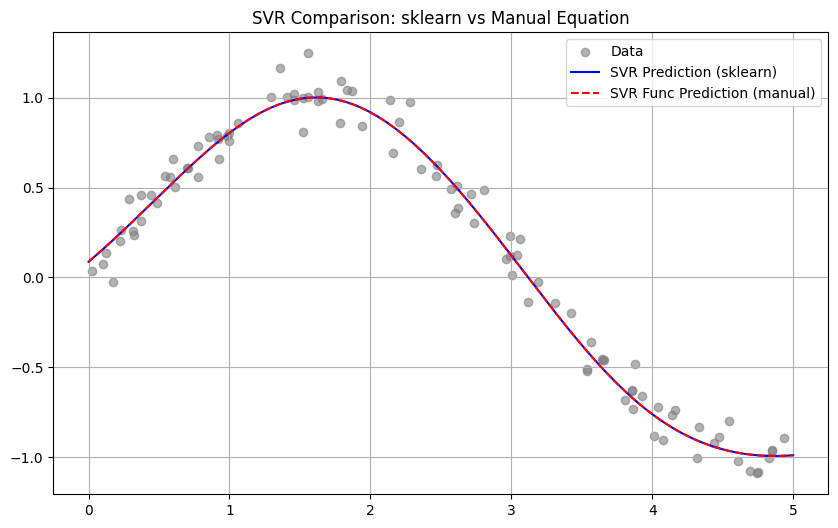

In [13]:
# Predict using sklearn model
y_sklearn_pred = svr_model.predict(X_grid)

# Predict using manual implementation
y_manual_pred = batch_manual_svr_predict(X_grid)

# Plot both predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.6, label='Data')
plt.plot(X_grid, y_sklearn_pred, color='blue', label='SVR Prediction (sklearn)')
plt.plot(X_grid, y_manual_pred, color='red', linestyle='--', label='SVR Func Prediction (manual)')
plt.legend()
plt.grid(True)
plt.title("SVR Comparison: sklearn vs Manual Equation")
plt.show()


Since our manual SVR function gives the same predictions as scikit-learn, we can say the extracted equation correctly represents the fitted model.

### Markdown or Latex code format

In [14]:
print("$$")
print("\\hat{y}(x) = ", end="")

for i in range(SV.shape[0]):
    print(f"{dual_coef[i]:+.4f} \\cdot \\exp\\left(-{gamma:.4f} \\cdot \\left(", end="")
    for j in range(SV.shape[1]):
        print(f"({SV[i, j]:.4f} - x_{{{j}}})^2", end="")
        if j < SV.shape[1] - 1:
            print(" + ", end="")
    print("\\right)\\right)", end="")

print(f"{intercept:+.4f}")
print("$$")


$$
\hat{y}(x) = -10.0000 \cdot \exp\left(-0.4565 \cdot \left((0.1719 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((0.2904 - x_{0})^2\right)\right)+0.7939 \cdot \exp\left(-0.4565 \cdot \left((0.3728 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((0.5980 - x_{0})^2\right)\right)-10.0000 \cdot \exp\left(-0.4565 \cdot \left((0.7800 - x_{0})^2\right)\right)-6.9346 \cdot \exp\left(-0.4565 \cdot \left((0.9243 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((1.3567 - x_{0})^2\right)\right)-10.0000 \cdot \exp\left(-0.4565 \cdot \left((1.5212 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((1.5586 - x_{0})^2\right)\right)-10.0000 \cdot \exp\left(-0.4565 \cdot \left((1.7838 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((1.7923 - x_{0})^2\right)\right)-4.7507 \cdot \exp\left(-0.4565 \cdot \left((1.9434 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((2.1377 - x_{0})^2

#The fitted SVR function is :
$$
\hat{y}(x) = -10.0000 \cdot \exp\left(-0.4565 \cdot \left((0.1719 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((0.2904 - x_{0})^2\right)\right)+0.7939 \cdot \exp\left(-0.4565 \cdot \left((0.3728 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((0.5980 - x_{0})^2\right)\right)-10.0000 \cdot \exp\left(-0.4565 \cdot \left((0.7800 - x_{0})^2\right)\right)-6.9346 \cdot \exp\left(-0.4565 \cdot \left((0.9243 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((1.3567 - x_{0})^2\right)\right)-10.0000 \cdot \exp\left(-0.4565 \cdot \left((1.5212 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((1.5586 - x_{0})^2\right)\right)-10.0000 \cdot \exp\left(-0.4565 \cdot \left((1.7838 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((1.7923 - x_{0})^2\right)\right)-4.7507 \cdot \exp\left(-0.4565 \cdot \left((1.9434 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((2.1377 - x_{0})^2\right)\right)-10.0000 \cdot \exp\left(-0.4565 \cdot \left((2.1597 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((2.2803 - x_{0})^2\right)\right)-7.2205 \cdot \exp\left(-0.4565 \cdot \left((2.3611 - x_{0})^2\right)\right)-10.0000 \cdot \exp\left(-0.4565 \cdot \left((2.6003 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((2.8064 - x_{0})^2\right)\right)+8.7106 \cdot \exp\left(-0.4565 \cdot \left((2.9933 - x_{0})^2\right)\right)-10.0000 \cdot \exp\left(-0.4565 \cdot \left((3.0056 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((3.0593 - x_{0})^2\right)\right)-10.0000 \cdot \exp\left(-0.4565 \cdot \left((3.1165 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((3.4212 - x_{0})^2\right)\right)-1.8818 \cdot \exp\left(-0.4565 \cdot \left((3.5343 - x_{0})^2\right)\right)-10.0000 \cdot \exp\left(-0.4565 \cdot \left((3.5404 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((3.8757 - x_{0})^2\right)\right)-10.0000 \cdot \exp\left(-0.4565 \cdot \left((4.0110 - x_{0})^2\right)\right)-9.7791 \cdot \exp\left(-0.4565 \cdot \left((4.0773 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((4.1622 - x_{0})^2\right)\right)-1.3507 \cdot \exp\left(-0.4565 \cdot \left((4.3155 - x_{0})^2\right)\right)+10.0000 \cdot \exp\left(-0.4565 \cdot \left((4.5466 - x_{0})^2\right)\right)-7.5871 \cdot \exp\left(-0.4565 \cdot \left((4.7444 - x_{0})^2\right)\right)-0.1477
$$